# 3. Multivariate Linear Regression

$$ H(x_1, x_2, x_3) = x_1w_1 + x_2w_2 + x_3w_3 + b $$

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

## Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(2)

## Naive Data Representation

In [3]:
# Data sample
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [4]:
# model Initialization
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):

    # H(x)
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost
    cost = torch.mean((hypothesis - y_train) ** 2)

    # update
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # print log
    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/10000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch 1000/10000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390
Epoch 2000/10000 w1: 0.757 w2: 0.571 w3: 0.682 b: 0.011 Cost: 0.754379
Epoch 3000/10000 w1: 0.788 w2: 0.541 w3: 0.682 b: 0.012 Cost: 0.562653
Epoch 4000/10000 w1: 0.812 w2: 0.517 w3: 0.681 b: 0.013 Cost: 0.448557
Epoch 5000/10000 w1: 0.832 w2: 0.500 w3: 0.678 b: 0.014 Cost: 0.379739
Epoch 6000/10000 w1: 0.848 w2: 0.488 w3: 0.675 b: 0.015 Cost: 0.337360
Epoch 7000/10000 w1: 0.861 w2: 0.478 w3: 0.671 b: 0.016 Cost: 0.310474
Epoch 8000/10000 w1: 0.871 w2: 0.472 w3: 0.667 b: 0.018 Cost: 0.292709
Epoch 9000/10000 w1: 0.880 w2: 0.467 w3: 0.663 b: 0.019 Cost: 0.280348
Epoch 10000/10000 w1: 0.888 w2: 0.464 w3: 0.658 b: 0.020 Cost: 0.271223


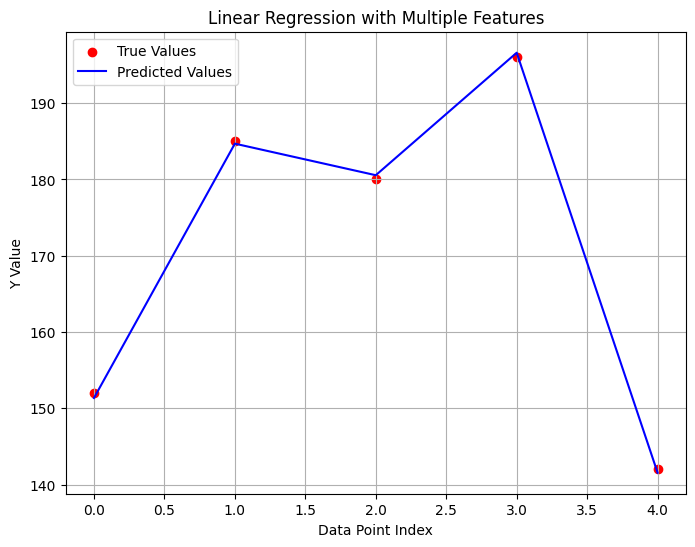

In [13]:
import matplotlib.pyplot as plt

predicted = w1.item() * x1_train + w2.item() * x2_train + w3.item() * x3_train + b.item()

# 플롯...dimension이 커서 직선으로 안보이겠지만 직선을 의미한다.
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train)), y_train.numpy(), color='red', label='True Values')  # 실제 값 (동그라미)
plt.plot(range(len(y_train)), predicted.detach().numpy(), color='blue', label='Predicted Values')  # 예측 값 (선)
plt.xlabel('Data Point Index')
plt.ylabel('Y Value')
plt.title('Linear Regression with Multiple Features')
plt.legend()
plt.grid()
plt.show()

## Better way: Matrix Data Representation

$$
\begin{pmatrix}
x_1 & x_2 & x_3
\end{pmatrix}
\cdot
\begin{pmatrix}
w_1 \\
w_2 \\
w_3 \\
\end{pmatrix}
=
\begin{pmatrix}
x_1w_1 + x_2w_2 + x_3w_3
\end{pmatrix}
$$

$$ H(X) = XW $$

In [14]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [15]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [16]:
# Initialization
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):

    # H(x)
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost
    cost = torch.mean((hypothesis - y_train) ** 2)

    # Update
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # print log
    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
            epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
        ))

Epoch    0/10000 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch 1000/10000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 1.079390
Epoch 2000/10000 hypothesis: tensor([152.1425, 184.1316, 180.7716, 196.8914, 140.7322]) Cost: 0.754379
Epoch 3000/10000 hypothesis: tensor([151.9242, 184.2831, 180.7070, 196.8267, 140.9463]) Cost: 0.562653
Epoch 4000/10000 hypothesis: tensor([151.7595, 184.3978, 180.6588, 196.7742, 141.1117]) Cost: 0.448561
Epoch 5000/10000 hypothesis: tensor([151.6356, 184.4845, 180.6230, 196.7311, 141.2401]) Cost: 0.379734
Epoch 6000/10000 hypothesis: tensor([151.5428, 184.5499, 180.5967, 196.6953, 141.3400]) Cost: 0.337358
Epoch 7000/10000 hypothesis: tensor([151.4737, 184.5989, 180.5777, 196.6651, 141.4182]) Cost: 0.310486
Epoch 8000/10000 hypothesis: tensor([151.4225, 184.6355, 180.5640, 196.6393, 141.4799]) Cost: 0.292713
Epoch 9000/10000 hypothesis: tensor([151.3851, 184.6628, 180.5545, 196.6168, 141.5288]) Cost: 0.280

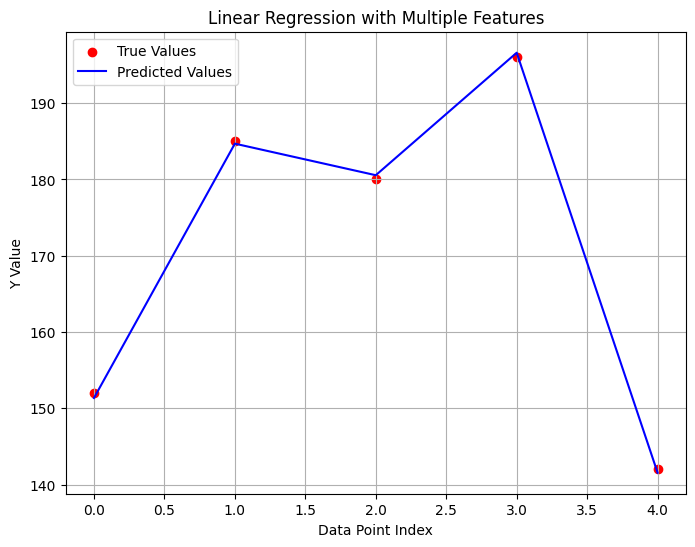

In [17]:
predicted = w1.item() * x1_train + w2.item() * x2_train + w3.item() * x3_train + b.item()

# 플롯...dimension이 커서 직선으로 안보이겠지만 직선을 의미한다.
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train)), y_train.numpy(), color='red', label='True Values')  # 실제 값 (동그라미)
plt.plot(range(len(y_train)), predicted.detach().numpy(), color='blue', label='Predicted Values')  # 예측 값 (선)
plt.xlabel('Data Point Index')
plt.ylabel('Y Value')
plt.title('Linear Regression with Multiple Features')
plt.legend()
plt.grid()
plt.show()

## High-level Implementation with `nn.Module`

Do you remember this model?

In [18]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

We just need to change the input dimension from 1 to 3!

In [19]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [20]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = MultivariateLinearRegressionModel()
print(list(model.parameters()))

optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 10000
for epoch in range(nb_epochs+1):

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

[Parameter containing:
tensor([[ 0.2466,  0.1375, -0.0664]], requires_grad=True), Parameter containing:
tensor([-0.4668], requires_grad=True)]
Epoch    0/10000 Cost: 21214.072266
Epoch 1000/10000 Cost: 0.827669
Epoch 2000/10000 Cost: 0.572159
Epoch 3000/10000 Cost: 0.422820
Epoch 4000/10000 Cost: 0.335275
Epoch 5000/10000 Cost: 0.283685
Epoch 6000/10000 Cost: 0.253047
Epoch 7000/10000 Cost: 0.234631
Epoch 8000/10000 Cost: 0.223330
Epoch 9000/10000 Cost: 0.216219
Epoch 10000/10000 Cost: 0.211561


In [21]:
# Test set
new_var =  torch.FloatTensor([[73, 80, 75]])
# prediction using the trained model
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)
print(list(model.parameters()))


훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.4608]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.9924, 0.5124, 0.5130]], requires_grad=True), Parameter containing:
tensor([-0.4520], requires_grad=True)]


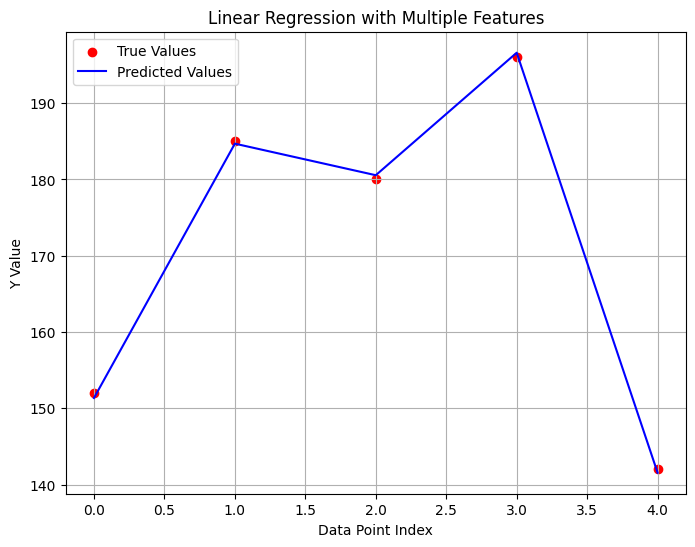

In [22]:
predicted = w1 * x1_train + w2 * x2_train + w3 * x3_train + b

# 플롯...dimension이 커서 직선으로 안보이겠지만 직선을 의미한다.
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train)), y_train.numpy(), color='red', label='True Values')  # 실제 값 (동그라미)
plt.plot(range(len(y_train)), predicted.detach().numpy(), color='blue', label='Predicted Values')  # 예측 값 (선)
plt.xlabel('Data Point Index')
plt.ylabel('Y Value')
plt.title('Linear Regression with Multiple Features')
plt.legend()
plt.grid()
plt.show()